In [107]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt
import pathlib

In [108]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [109]:
train_dir = pathlib.Path("/home/howard/Homework/Algorithm/Final_Project/handwrite_detect_new/train_image/")
val_dir = pathlib.Path("/home/howard/Homework/Algorithm/Final_Project/handwrite_detect_new/test_image/")

In [110]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data


In [111]:
batch_size = 128
epochs = 20
IMG_HEIGHT = 28
IMG_WIDTH = 28


In [112]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical')


Found 2450 images belonging to 10 classes.


In [113]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=val_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='categorical')


Found 1700 images belonging to 10 classes.


In [114]:
model_new = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])


model.summary()



Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_7 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)               

In [115]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=2450 // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=1700 // batch_size
)



Epoch 1/20
19/19 [==============================] - 1s 47ms/step - loss: 0.0171 - accuracy: 0.9815 - val_loss: 0.0341 - val_accuracy: 0.9507
Epoch 2/20
19/19 [==============================] - 1s 45ms/step - loss: 0.0074 - accuracy: 0.9966 - val_loss: 0.0291 - val_accuracy: 0.9543
Epoch 3/20
19/19 [==============================] - 1s 44ms/step - loss: 0.0052 - accuracy: 0.9966 - val_loss: 0.0255 - val_accuracy: 0.9561
Epoch 4/20
19/19 [==============================] - 1s 44ms/step - loss: 0.0045 - accuracy: 0.9957 - val_loss: 0.0280 - val_accuracy: 0.9603
Epoch 5/20
19/19 [==============================] - 1s 45ms/step - loss: 0.0038 - accuracy: 0.9974 - val_loss: 0.0329 - val_accuracy: 0.9597
Epoch 6/20
19/19 [==============================] - 1s 44ms/step - loss: 0.0033 - accuracy: 0.9983 - val_loss: 0.0251 - val_accuracy: 0.9633
Epoch 7/20
19/19 [==============================] - 1s 44ms/step - loss: 0.0027 - accuracy: 0.9987 - val_loss: 0.0269 - val_accuracy: 0.9609
Epoch 8/20
19

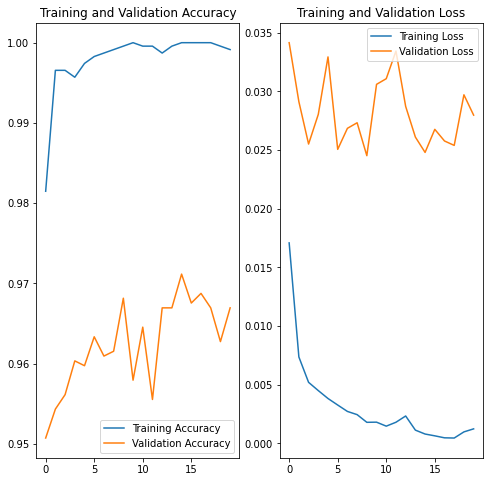

In [116]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
